# Applying Machine Learning Models

In [ ]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
# metrics: 計測 → 評価
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
# カーネルなしSVM（SVC: Support Vector Classifierの略）
from sklearn.svm import LinearSVC
# カーネル法を用いたSVM
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
epsilons = [ 0.01, 
0.05, 
0.1, 
0.5, 
0.7, 
0.8, 
0.9, 
1.0, 
1.2, 
1.4, 
1.5, 
1.6, 
1.7, 
1.8, 
1.9, ]

In [ ]:
data1 = pd.read_csv('Data_UCI_not_noise_1.csv')
data2 = pd.read_csv('Data_UCI_not_noise_2.csv')

df_concat = pd.concat([data1, data2])

print(df_concat.shape)

(9233, 642)


In [ ]:
labels_act = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']

labels_uid = list()
for i in range(1, 31):
    labels_uid.append(i)

In [ ]:
from sklearn.model_selection import train_test_split

def split_train_test_data(df, id):
  X = df.drop(['user_Id', 'activity_Id'], axis=1)
  y = df[id]

  return train_test_split(X, y, test_size=0.33, random_state=42) # X_train, X_test, y_train, y_test

  # for i in X_train.columns:
  #   print(X_train[i].dtype)
  # print(X_train.dtypes)

  # # 訓練用
  # X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
  # y_train = train['subject']

  # # テスト用
  # X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
  # y_test = test['subject']

  # print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
  # print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

Let's make a function to plot the confusion matrix

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    # normalize → 正規化
    if normalize:
        # cmの値は予測結果と実際の値の一致数なので，それを列の合計で割ると確率
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # np.newaxisは次元を追加
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        # plt.text(): 座標（x, y），表示するテキスト，文字位置，色指定
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Let's make a function to run any model specified

In [ ]:
# 任意のモデルを実行
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_nomalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model...')
    model.fit(X_train, y_train)
    print('Done')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    # 予測結果を格納
    results['predicted'] = y_pred
    
    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    # output confusion matrix
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(6, 6))
    plt.grid(b=False) # グリッドを非表示
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    print('****************| Classifiction Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
    
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained model to the results
    results['model'] = model
    
    return results
    

In [ ]:
# 任意のモデルを実行
def perform_model_epsilon(model, X_train, y_train, X_test, y_test, class_labels, cm_nomalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model...')
    model.fit(X_train, y_train)
    print('Done')
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print('==> training time:- {}\n'.format(results['training_time']))
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print('==> testing time:- {}\n'.format(results['testing_time']))
    # 予測結果を格納
    results['predicted'] = y_pred
    
    # calculate overall accuracy of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('==> Accuracy:- {}\n'.format(accuracy))
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    # output confusion matrix
    if print_cm:
        print('\n ********Confusion Matrix********')
        print('\n {}'.format(cm))
    
    # plot confusion matrix
    plt.figure(figsize=(15, 15))
    plt.grid(b=False) # グリッドを非表示
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap = cm_cmap)
    plt.show()
    
    # get classification report
    # print('****************| Classifiction Report |****************')
    # classification_report = metrics.classification_report(y_test, y_pred)
    
    # # store report in results
    # results['classification_report'] = classification_report
    # print(classification_report)
    
    # get f1 score
    f1 = metrics.f1_score(y_test, y_pred, average="macro")
    print("\n F1 Score:{}".format(f1))
    
    # add the trained model to the results
    results['model'] = model
    
    return results, f1
    

Make function to print the gridsearch Parameters

In [ ]:
# 同一モデルでの値を表示
def print_grid_search_attributes(model):
    
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('\n\n==> Best Estimator:')
    print('\t{}\n'.format(model.best_estimator_))
    
    # parameters that gave best results while perfoming grid search
    print('\n==> Best parameters:')
    print('\tParameters of best estimator : {}'.format(model.best_params_))
    
    # number of cross validation splits
    print('\n==> No. of CrossValidation sets:')
    print('\tTotal nmber of cross validation sets: {}'.format(model.n_splits_))
    
    # Average cross validated score of the best estimator, from the Grid Search
    print('\n==> Best Score:')
    print('\tAverage Cross Validate scores of Best estimator : {}'.format(model.best_score_))

## 5. Random Forest Classifier with GridSearch

epsilon: 0.0001
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:11:11.712424

Predicting test data
==> testing time:- 0:00:00.075827

==> Accuracy:- 0.037742041352149654


 ********Confusion Matrix********

 [[ 1  1  1  0  0  0  0  0  0  0  2  0  1  0  0  6  3  5  0  0 10  1  1  8
  19 46  7  2  4  2]
 [ 2  0  0  0  0  0  0  1  0  0  0  0  1  0  1  3  2  4  0  0  8  0  1 13
  14 41  6  0  4  2]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  3  4  7  0  0  6  0  1 14
  15 27  5  1  5  6]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  1  4  8  0  0  7  0  1 12
  11 27  8  1  4  5]
 [ 2  0  0  0  0  1  0  1  0  0  0  0  0  0  0  3  3  6  0  0  2  0  2 12
  15 24  6  1  7  4]
 [ 2  2  1  0  0  0  0  0  0  0  1  0  1  0  0  7  2  8  0  0  6  0  0  7
   9 26  9  1  4  2]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  2  0  0  2  4  9  1  0  5  0  1 13
  13 24  4  0  0  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  5  3  3  0  0  3

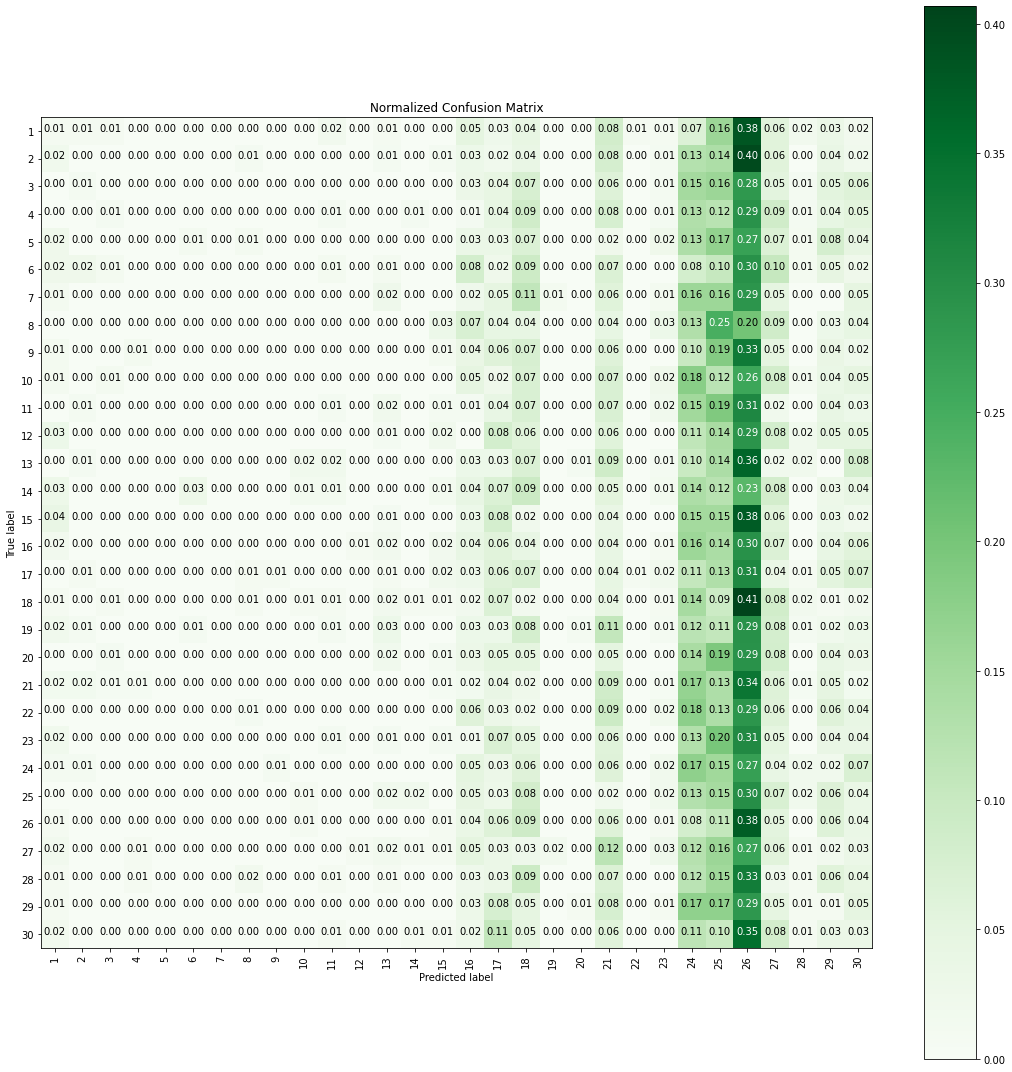


 F1 Score:0.017246770683357004


==> Best Estimator:
	RandomForestClassifier(max_depth=10, n_estimators=110)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 10, 'n_estimators': 110}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.04752521539030146
epsilon: 0.001
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:11:05.547611

Predicting test data
==> testing time:- 0:00:00.089378

==> Accuracy:- 0.032819166393173616


 ********Confusion Matrix********

 [[ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  4  9  0  1  6  0  0 13
  20 55  3  1  2  4]
 [ 0  0  1  1  1  0  0  0  0  0  0  0  0  0  0  1  2  4  0  0  3  0  0 20
  13 45  5  1  2  4]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  5  6  0  0  3  0  0 16
   9 48  0  0  4  1]
 [ 0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  1  3  5  0  0 11  0  0  9
  15

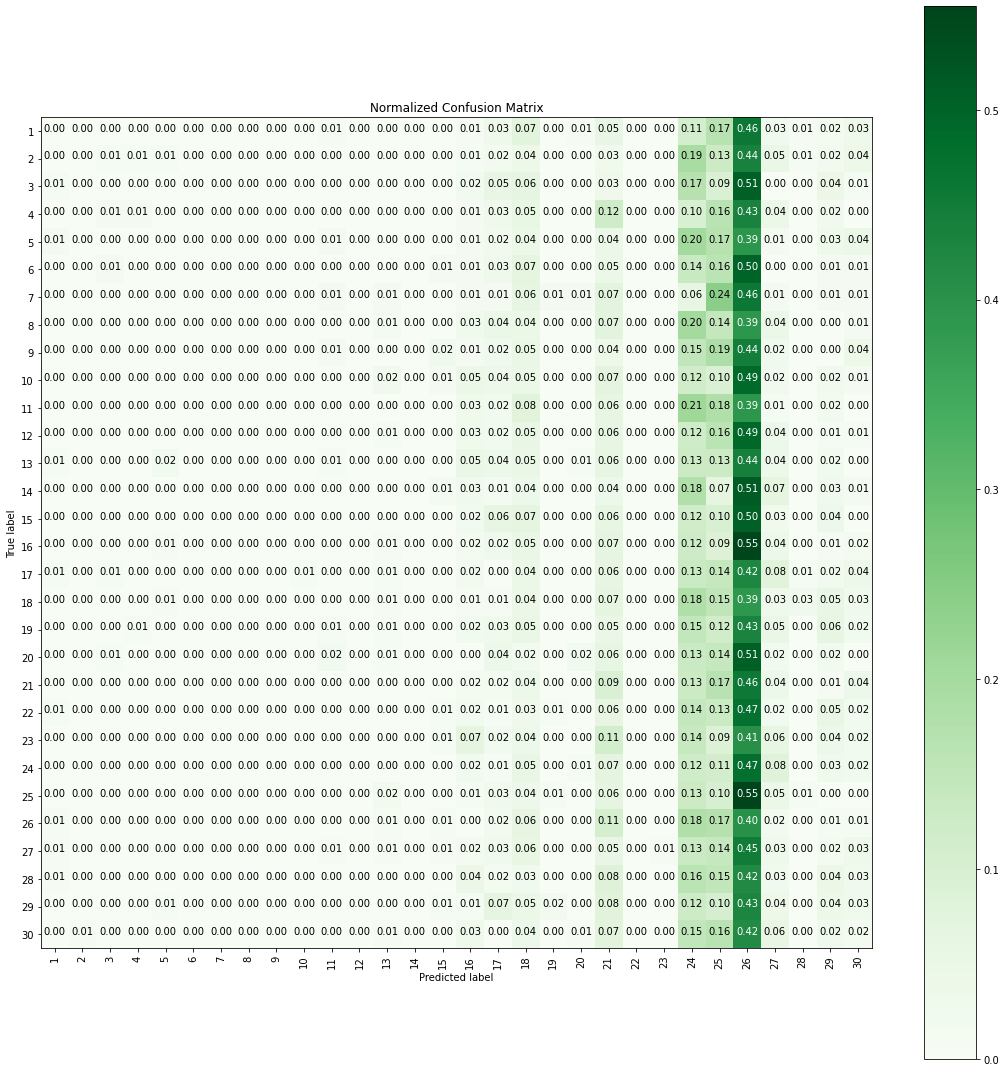


 F1 Score:0.014664669981262174


==> Best Estimator:
	RandomForestClassifier(max_depth=6, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 6, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.04720368080051926
epsilon: 0.05
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:14:04.371231

Predicting test data
==> testing time:- 0:00:00.192309

==> Accuracy:- 0.033475549721037084


 ********Confusion Matrix********

 [[ 1  2  0  0  0  0  0  1  0  0  2  0  1  0  0  2  6 12  0  0 13  1  1 18
  19 33  3  0  4  1]
 [ 1  0  1  1  0  0  0  0  0  0  0  0  1  0  0  1  1  7  0  1 16  0  1 15
  16 29  7  1  3  1]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  1  3  0  9  0  0  8  0  0 13
  25 17  6  1  3  7]
 [ 1  0  1  0  0  0  0  0  1  0  0  2  0  0  0  3  6  7  0  0  8  0  1 14
  15 23

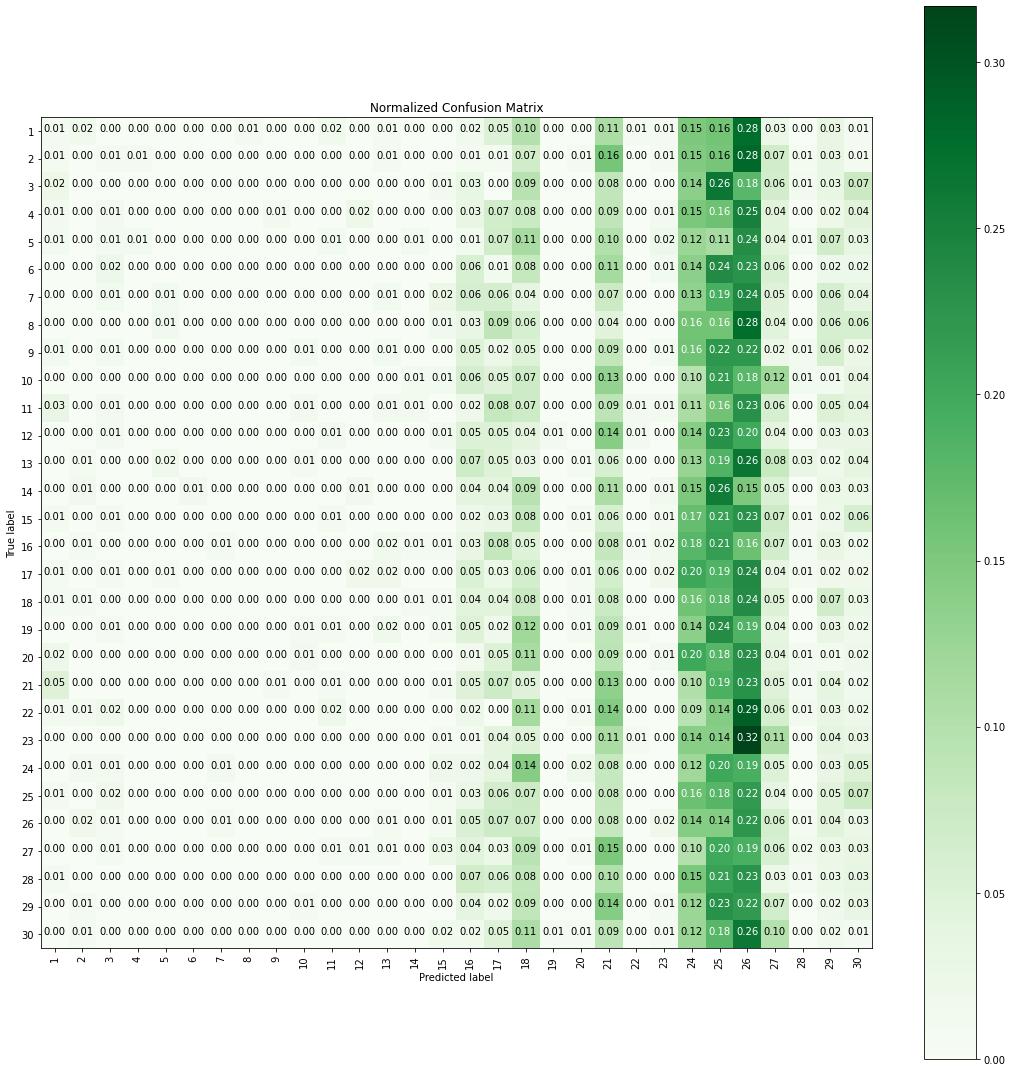


 F1 Score:0.015286690226399485


==> Best Estimator:
	RandomForestClassifier(max_depth=12, n_estimators=140)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 12, 'n_estimators': 140}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.04494066237170287
epsilon: 0.7
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:20:42.043181

Predicting test data
==> testing time:- 0:00:00.157274

==> Accuracy:- 0.041352149655398754


 ********Confusion Matrix********

 [[ 2  0  0  0  0  0  0  0  0  1  0  0  2  0  0  6  4 10  0  0 12  0  1 19
  23 30  6  0  3  1]
 [ 2  1  0  0  0  0  0  0  0  2  0  0  0  0  0  6  5 10  1  0 10  0  1 18
  13 25  5  0  2  2]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  1  1  4  8  0  0 11  0  1  9
  17 25  6  0  5  5]
 [ 2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  4  5  7  0  0 13  0  2  8
  14 3

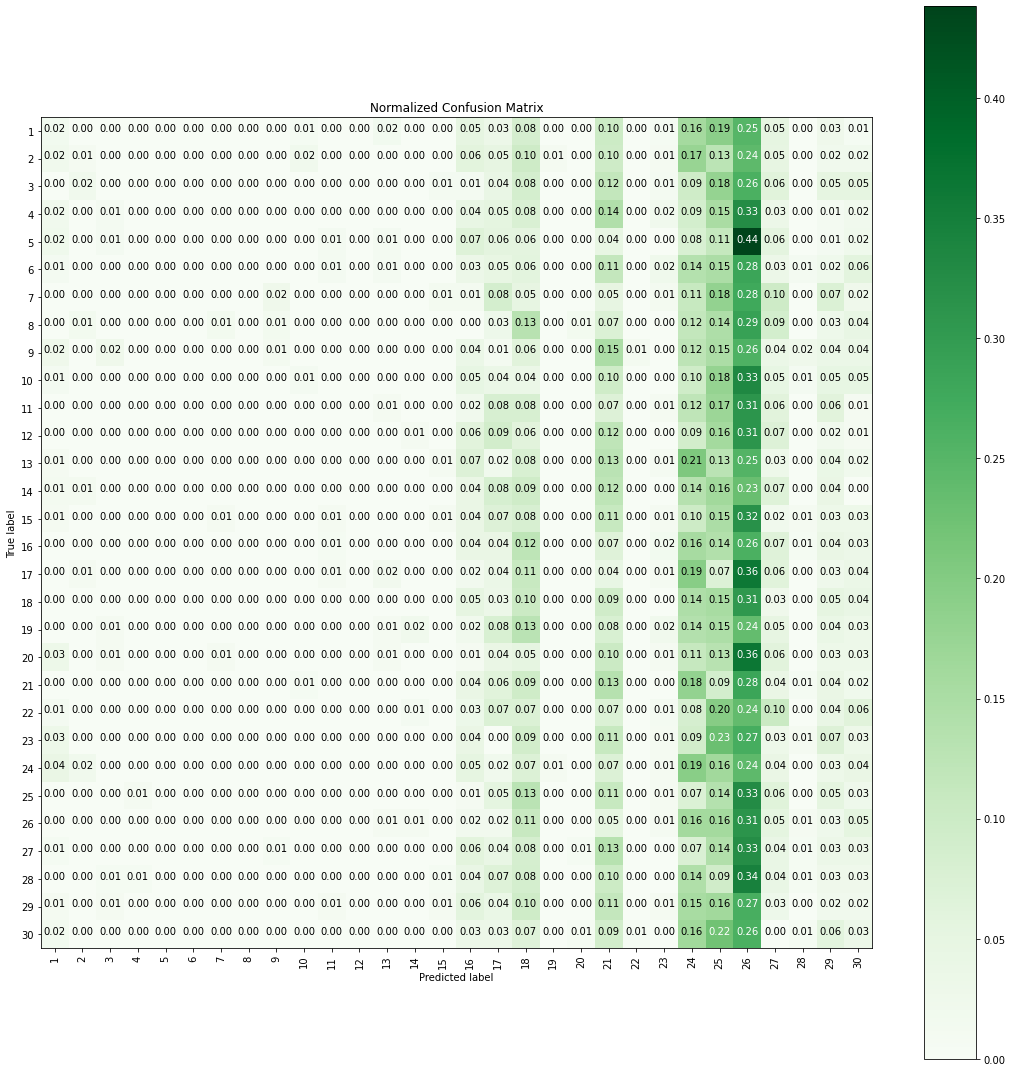


 F1 Score:0.02165988290921155


==> Best Estimator:
	RandomForestClassifier(max_depth=8, n_estimators=120)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 8, 'n_estimators': 120}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.05027497606774428
epsilon: 0.8
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:20:28.038125

Predicting test data
==> testing time:- 0:00:00.111241

==> Accuracy:- 0.04299310797505743


 ********Confusion Matrix********

 [[ 4  1  0  0  0  0  0  0  0  0  0  0  0  1  0  3  5  8  0  0 16  0  0 19
  13 30  9  0  6  5]
 [ 0  0  1  0  0  0  0  1  0  0  0  0  1  0  1  7  7  6  0  0 14  1  2 17
  15 21  2  1  4  2]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  4  7  0  0 14  0  1 13
  16 20  7  2  4  4]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  2  1  6  0  0 11  0  0 19
  17 24  4

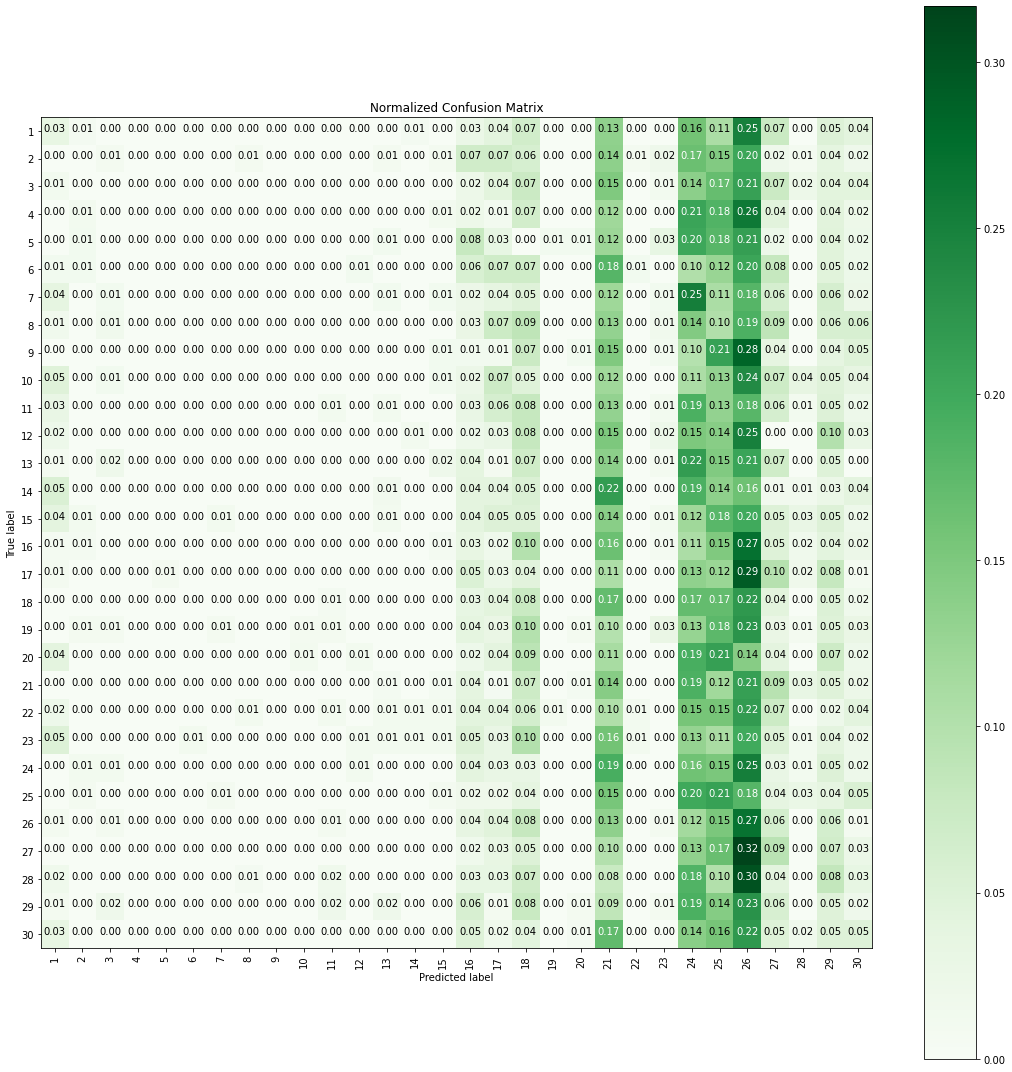


 F1 Score:0.02183251471414976


==> Best Estimator:
	RandomForestClassifier(max_depth=8, n_estimators=110)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 8, 'n_estimators': 110}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.05027536786456368
epsilon: 0.9
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:18:41.239101

Predicting test data
==> testing time:- 0:00:00.247388

==> Accuracy:- 0.04660321627830653


 ********Confusion Matrix********

 [[11  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  5  7  0  0 14  0  0 13
  16 35  6  0  7  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  3  8  0  0 10  0  0 10
  25 27  5  2  6  5]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  2  0  0  2  3  4  0  0 12  0  1 12
  18 25  5  0  5  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  1  1  5  0  0  9  0  2 13
  15 28  6

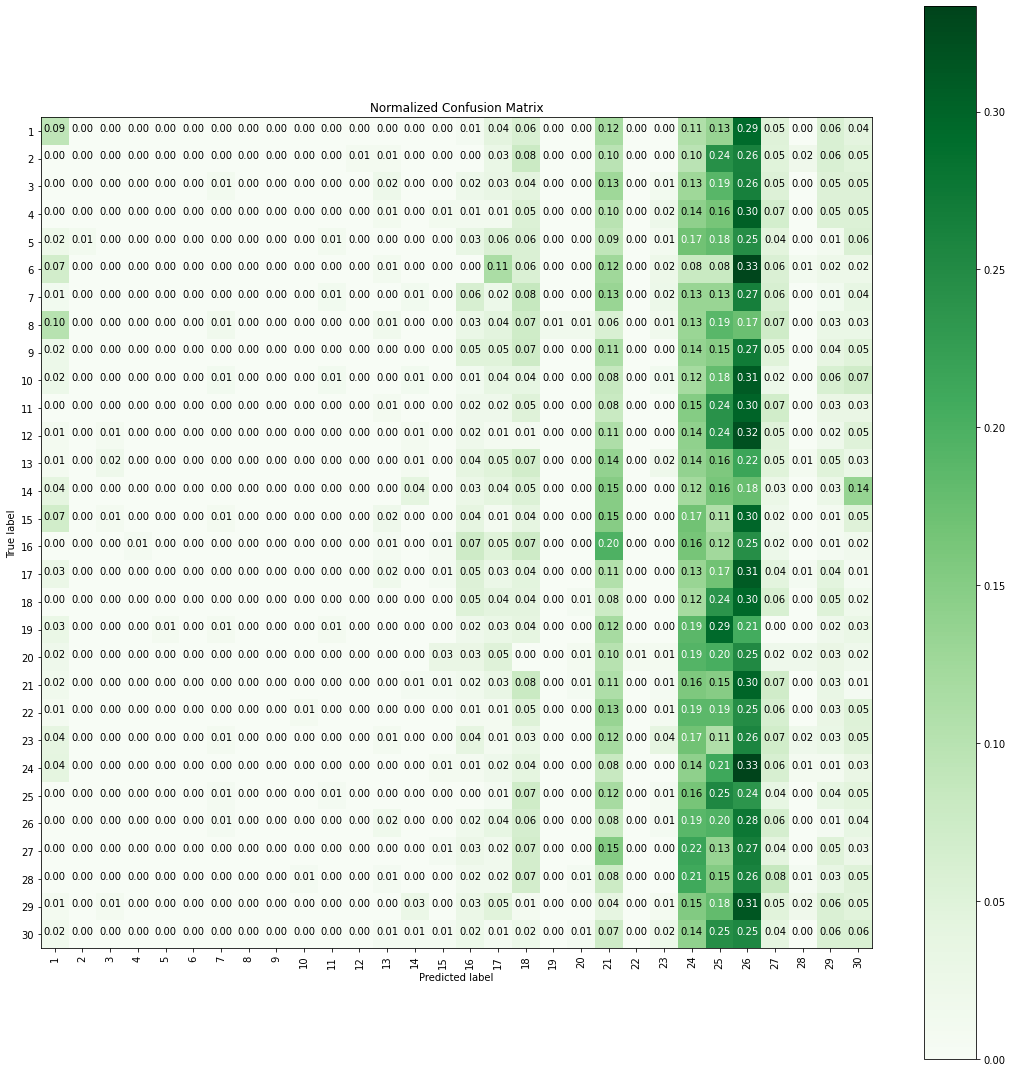


 F1 Score:0.028487947977453253


==> Best Estimator:
	RandomForestClassifier(max_depth=8, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 8, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.05269967598403036
epsilon: 1.6
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:19:37.977321

Predicting test data
==> testing time:- 0:00:00.195273

==> Accuracy:- 0.08795536593370529


 ********Confusion Matrix********

 [[26  0  0  0  0  0  0  0  0  0  0  0  2  6  0  3  1  8  0  2  7  0  1  6
  14 27  3  0  3 11]
 [ 7  0  0  0  0  0  0  0  0  0  0  0  1  0  0  4  5  4  0  0 10  1  1 13
  13 36  1  0  2  5]
 [ 1  0  0  0  0  0  1  0  0  1  0  0  1  1  0  2  1  6  0  0  7  0  1 18
  25 25  4  0  1  0]
 [ 2  0  0  0  0  0  0  0  0  1  1  0  0  0  0  2  2  5  0  0  6  0  0 15
  27 23  

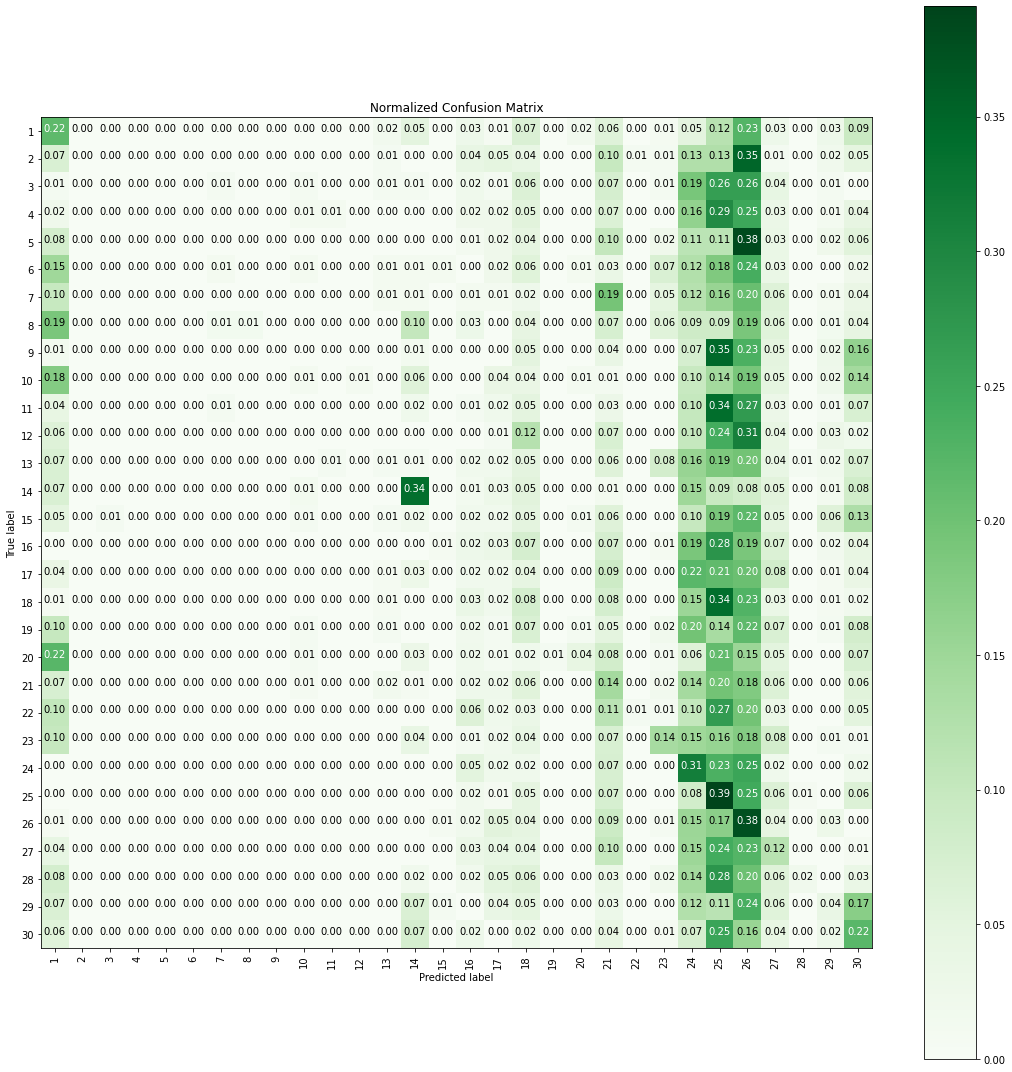


 F1 Score:0.058263102616550516


==> Best Estimator:
	RandomForestClassifier(max_depth=6, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 6, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.09343544429106324
epsilon: 1.7
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:19:27.994406

Predicting test data
==> testing time:- 0:00:00.153503

==> Accuracy:- 0.09255004922874958


 ********Confusion Matrix********

 [[40  0  0  0  0  0  1  0  0  0  0  0  0  4  0  3  4  2  0  0  8  0  4 12
  14 16  1  0  3  8]
 [ 6  0  0  0  0  0  0  0  0  0  0  0  0  2  0  3  2  4  0  0 16  1  1 26
  14 20  4  0  3  1]
 [ 4  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  3  5  0  0 11  0  1 17
  15 27  5  0  1  3]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  6  6  0  0  6  0  0 11
  22 28  

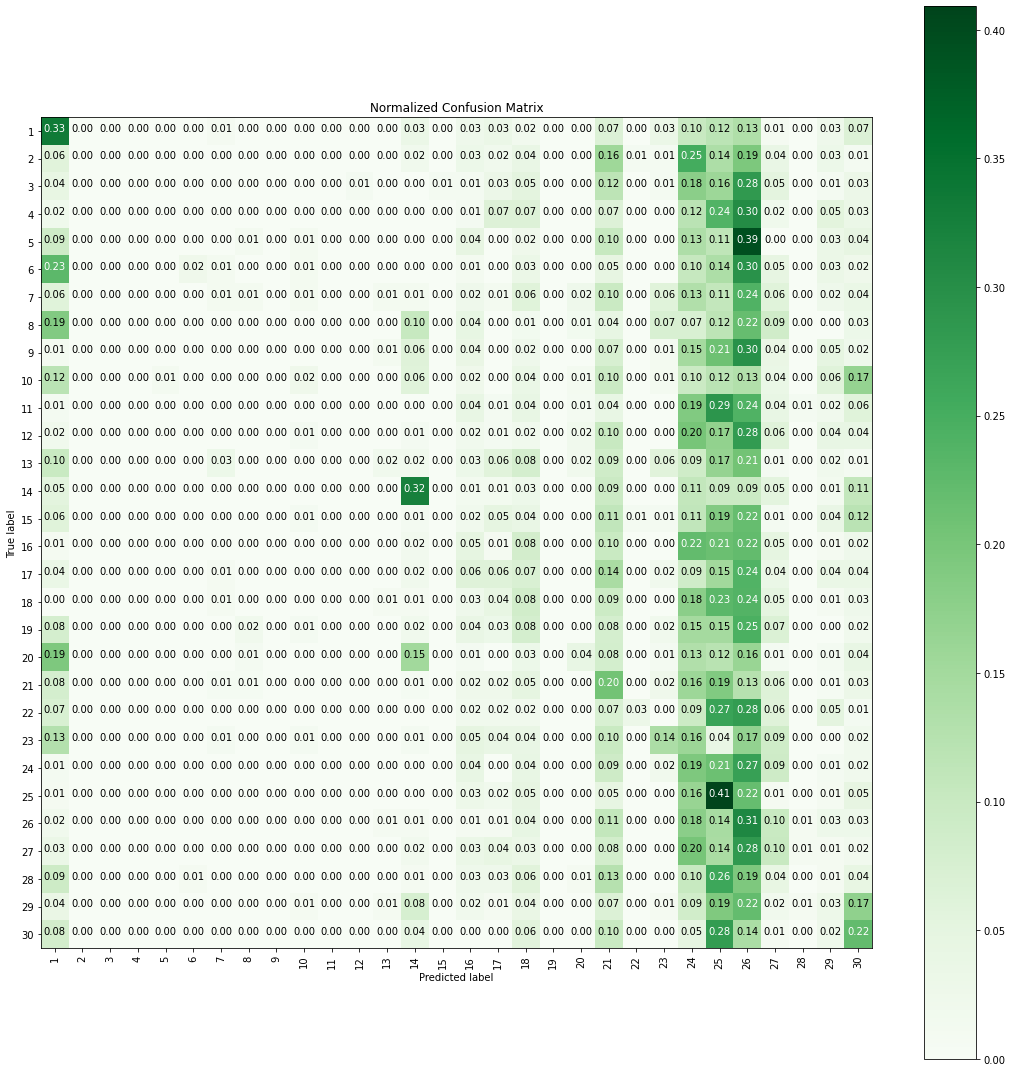


 F1 Score:0.06441280789123116


==> Best Estimator:
	RandomForestClassifier(max_depth=6, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 6, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.09408360682927977
epsilon: 1.8
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:19:25.633413

Predicting test data
==> testing time:- 0:00:00.161747

==> Accuracy:- 0.11060059074499508


 ********Confusion Matrix********

 [[42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  6  0  4  4  0  2  4
  28  7  3  0  5 10]
 [ 5  1  0  0  0  0  0  0  0  1  0  0  0  5  0  1  3  5  0  2  9  0  3 12
  15 24 10  0  5  2]
 [ 4  0  0  0  1  0  0  0  0  0  0  0  0  1  0  3  5  2  0  0 14  1  0 11
  23 17  6  1  3  3]
 [ 1  0  1  0  1  0  0  0  0  0  0  0  0  0  1  1  1  3  0  0  3  0  0 16
  29 25  4

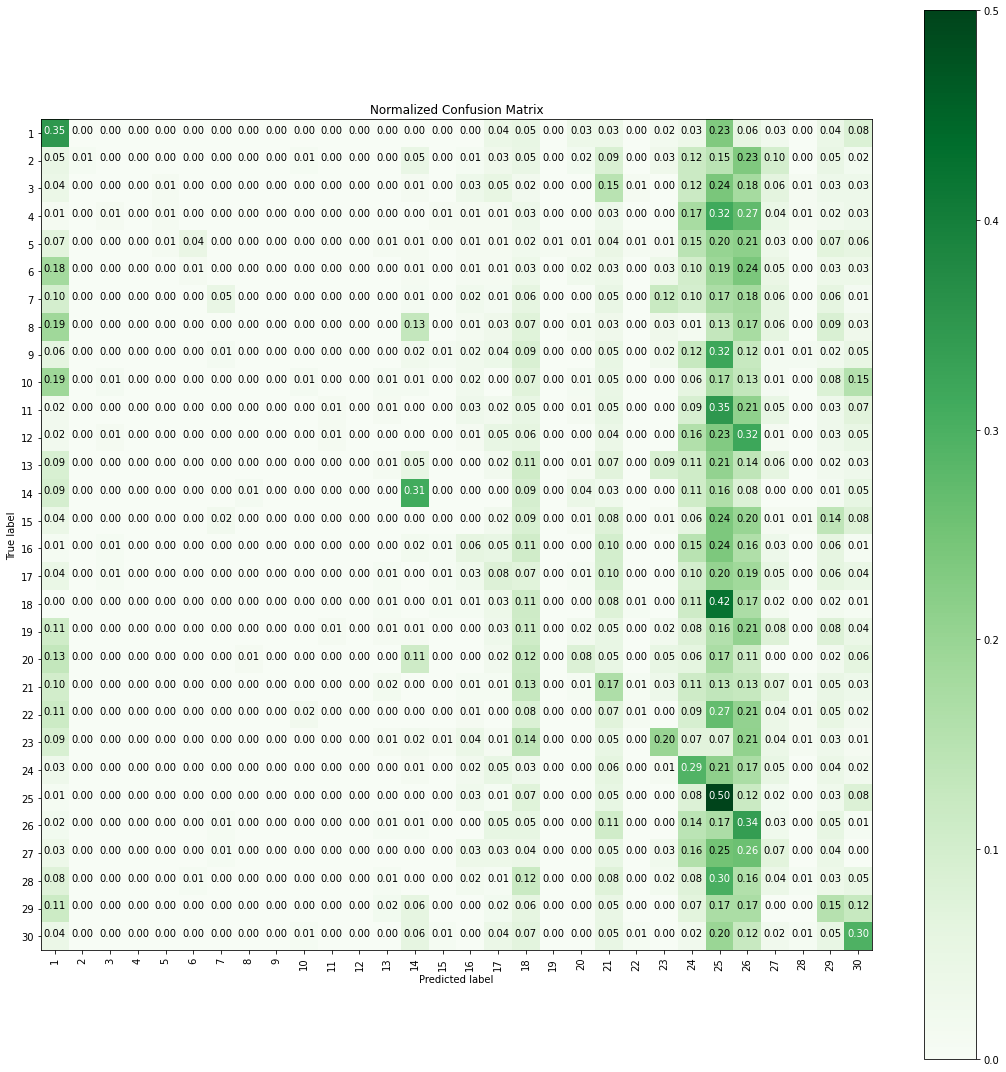


 F1 Score:0.07824240887026337


==> Best Estimator:
	RandomForestClassifier(max_depth=6, n_estimators=120)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 6, 'n_estimators': 120}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.10426640616531475


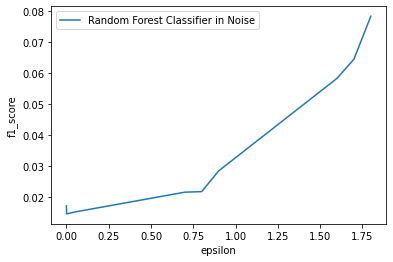

[0.017246770683357004, 0.014664669981262174, 0.015286690226399485, 0.02165988290921155, 0.02183251471414976, 0.028487947977453253, 0.058263102616550516, 0.06441280789123116, 0.07824240887026337]


In [ ]:
f1_array_random_uid = []
acc_array_random_uid = []

params = {'n_estimators': np.arange(110,151,10), 'max_depth':np.arange(6,15,2)}

for epsilon in epsilons:
  print("epsilon: "+ str(epsilon))
  X_train, X_test, y_train, y_test = split_train_test_data(df_concat, 'user_Id')

  for col in X_train:
    # default sensitivity = 1.0
    # print("------epsilon--------")
    X_train[col] = X_train[col].apply(lambda x: x + np.random.laplace(0, 1.0/epsilon))
    X_test[col] = X_test[col].apply(lambda x: x + np.random.laplace(0, 1.0/epsilon))

  rfc = RandomForestClassifier()
  rfc_grid = GridSearchCV(rfc, param_grid=params, cv=5, verbose=1, n_jobs=-1)
  rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels_uid)

  f1_array_random_uid.append(f1)
  acc_array_random_uid.append(rfc_grid_results['accuracy'])

  # observe the attributes of the model 
  print_grid_search_attributes(rfc_grid_results['model'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epsilons, f1_array_random_uid, label='Random Forest Classifier in Noise')
ax.set_xlabel('epsilon')
ax.set_ylabel('f1_score')
plt.legend(loc='best')
plt.show()

print(f1_array_random_uid)


epsilon: 0.0001
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:08:00.877747

Predicting test data
==> testing time:- 0:00:00.094472

==> Accuracy:- 0.18017722349852314


 ********Confusion Matrix********

 [[179  36  11  41 144 130]
 [154  40  13  40 152  93]
 [127  34  10  47 116  94]
 [172  39   7  38 141 109]
 [159  38  19  34 152 131]
 [160  34  10  46 167 130]]


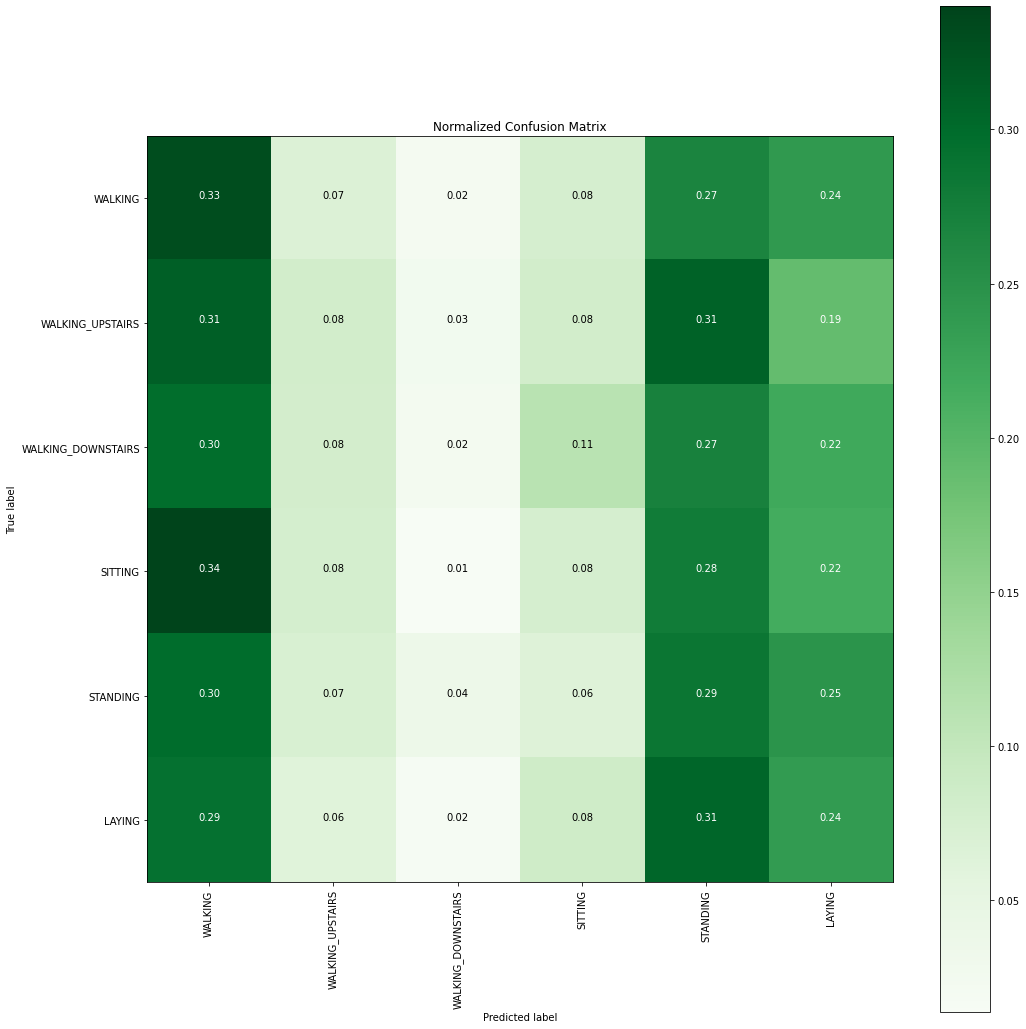


 F1 Score:0.15340664065566037


==> Best Estimator:
	RandomForestClassifier(max_depth=14, n_estimators=140)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 14, 'n_estimators': 140}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.1831563935363973
epsilon: 0.001
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:07:44.397332

Predicting test data
==> testing time:- 0:00:00.051881

==> Accuracy:- 0.17820807351493273


 ********Confusion Matrix********

 [[200   1   1   4 209 126]
 [174   3   0   1 198 116]
 [175   1   0   2 161  89]
 [200   3   1   5 190 107]
 [209   3   0   5 214 102]
 [206   1   0   2 217 121]]


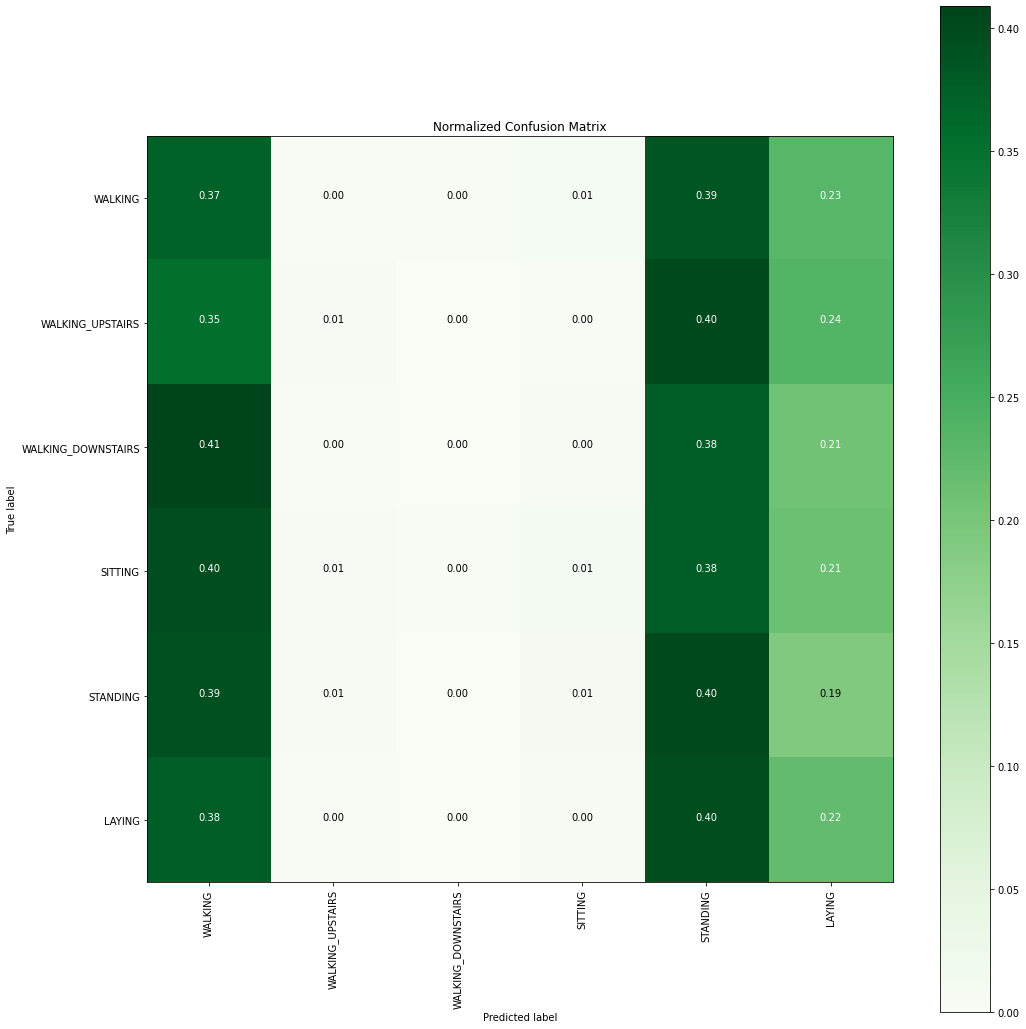


 F1 Score:0.11907263535329249


==> Best Estimator:
	RandomForestClassifier(max_depth=6, n_estimators=130)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 6, 'n_estimators': 130}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.19382384553802193
epsilon: 0.05
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:07:44.767630

Predicting test data
==> testing time:- 0:00:00.055022

==> Accuracy:- 0.17919264850672792


 ********Confusion Matrix********

 [[182   1   0   4 222 132]
 [170   1   0   3 218 100]
 [149   1   0   1 173 104]
 [165   2   0   2 225 112]
 [202   2   0   2 215 112]
 [178   1   0   6 216 146]]


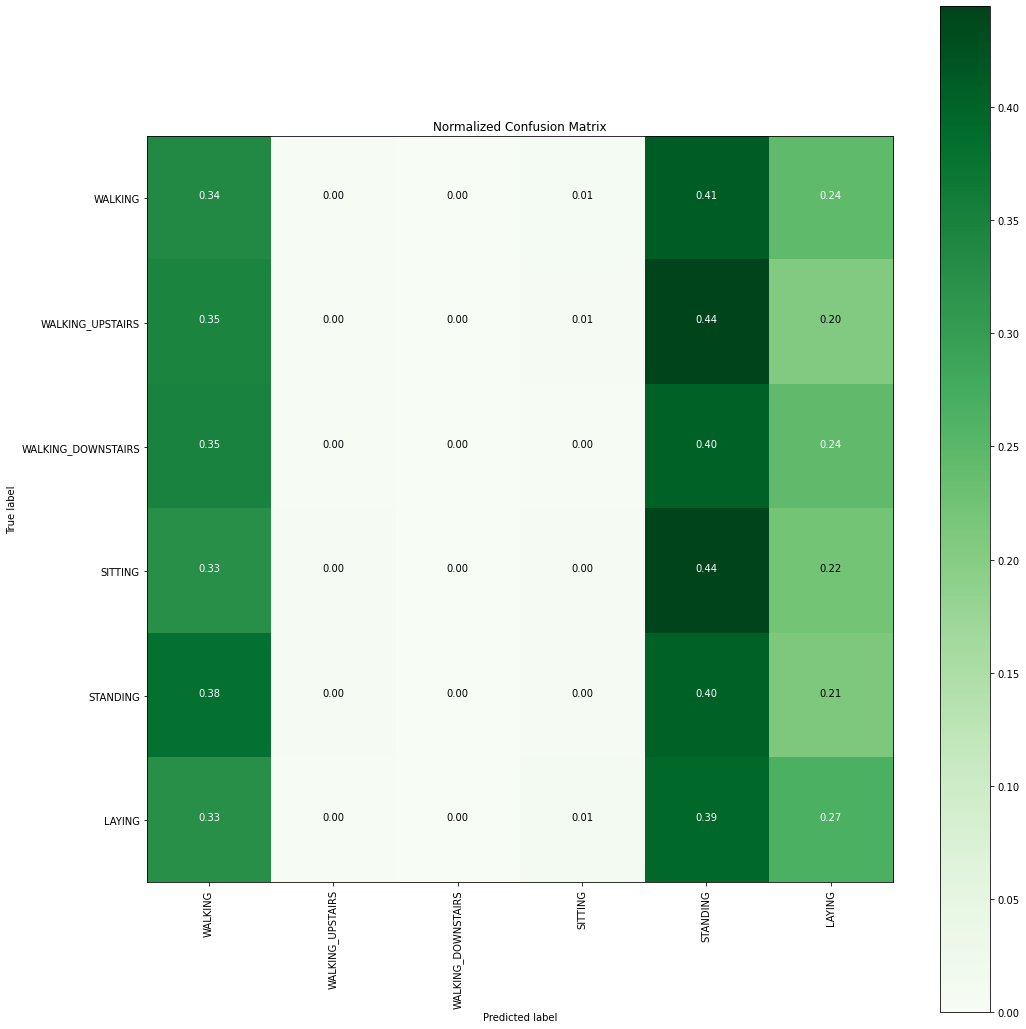


 F1 Score:0.11877693676134625


==> Best Estimator:
	RandomForestClassifier(max_depth=6, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 6, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.18719516574964445
epsilon: 0.7
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:06:45.088186

Predicting test data
==> testing time:- 0:00:00.087958

==> Accuracy:- 0.5100098457499179


 ********Confusion Matrix********

 [[414  36  52   4  23  12]
 [308  79  46   2  36  21]
 [228  23 167   0   7   3]
 [  2   0   0  50 342 112]
 [  4   2   1  54 370 102]
 [  2   0   0  12  59 474]]


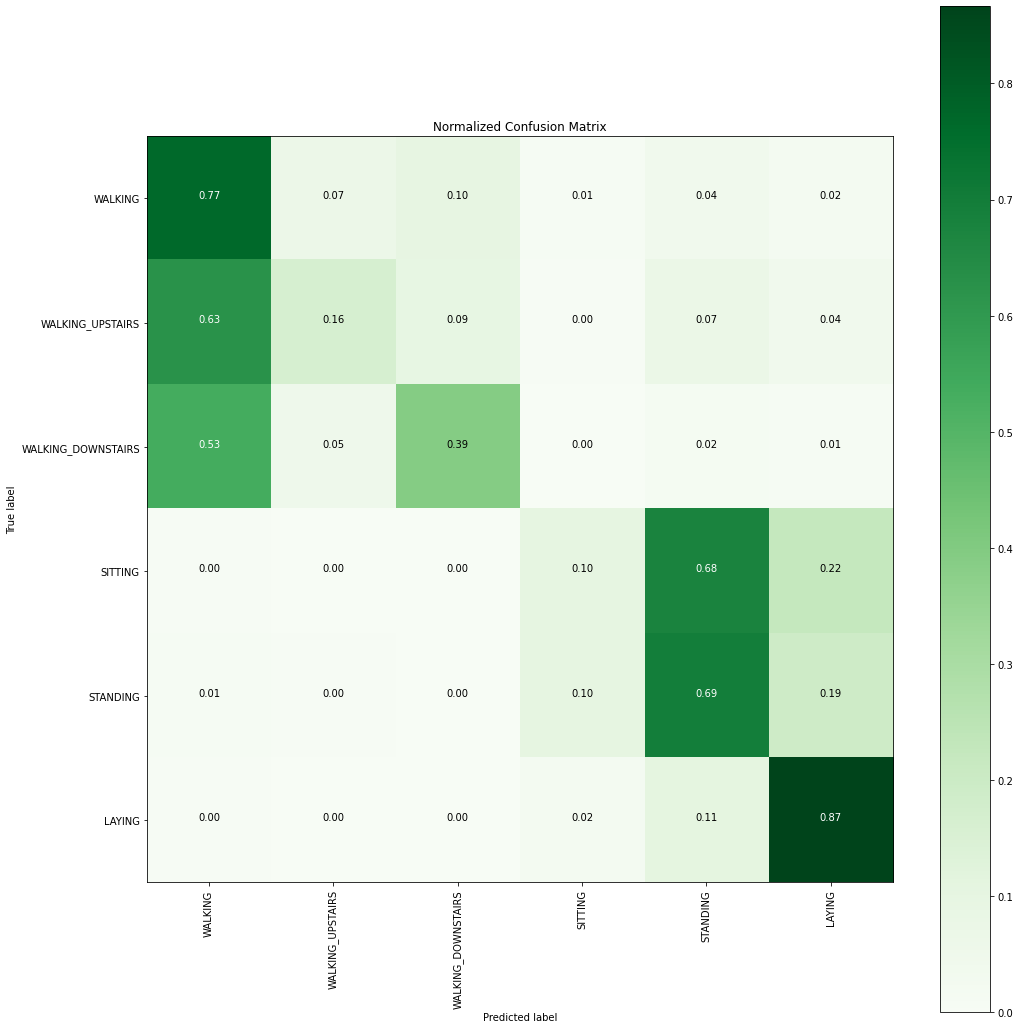


 F1 Score:0.45481455089890943


==> Best Estimator:
	RandomForestClassifier(max_depth=8, n_estimators=140)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 8, 'n_estimators': 140}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.5166497976369427
epsilon: 0.8
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:06:43.958544

Predicting test data
==> testing time:- 0:00:00.074889

==> Accuracy:- 0.5339678372169346


 ********Confusion Matrix********

 [[414  39  66   0  15   7]
 [308  97  51   4  22  10]
 [204  32 186   2   1   3]
 [  3   1   0  50 325 127]
 [  3   1   0  51 406  72]
 [  0   1   0  16  56 474]]


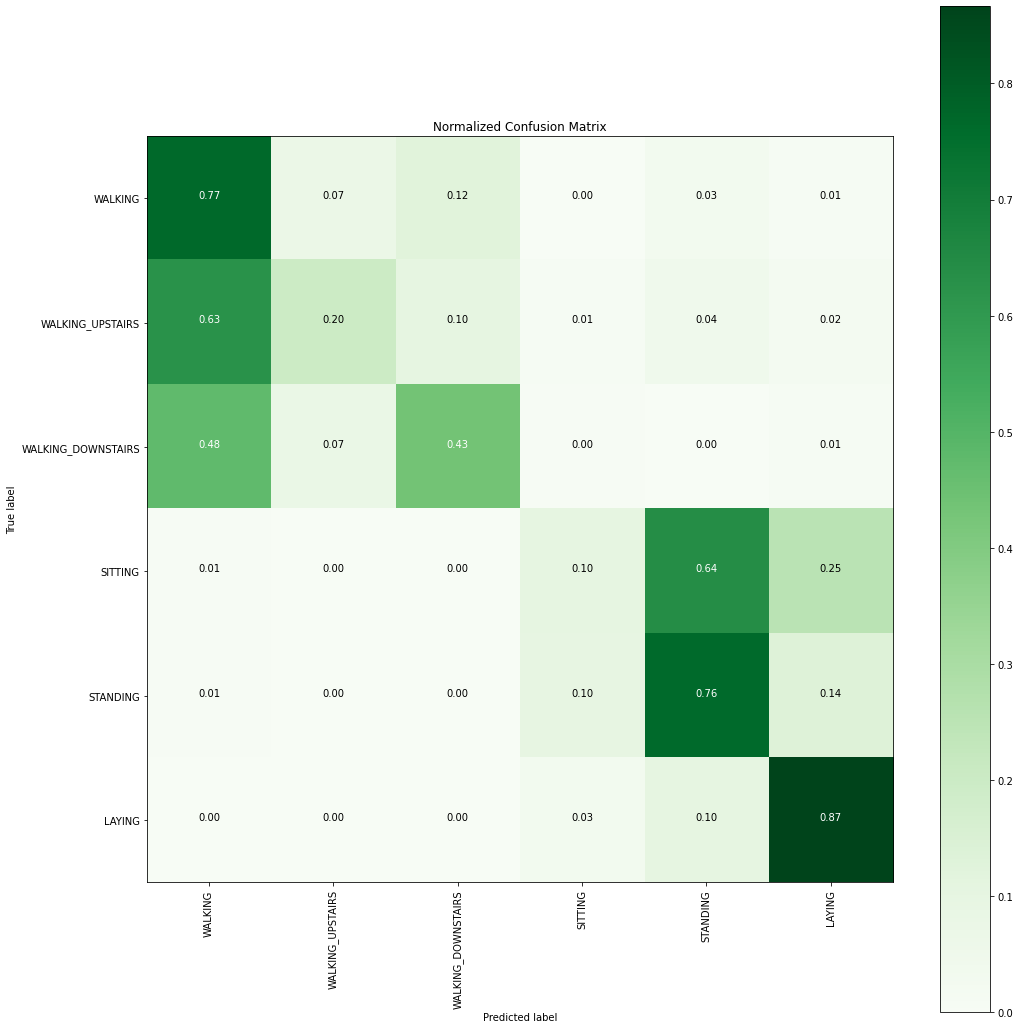


 F1 Score:0.480842698642701


==> Best Estimator:
	RandomForestClassifier(max_depth=8, n_estimators=120)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 8, 'n_estimators': 120}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.5472052479877968
epsilon: 0.9
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:06:45.474303

Predicting test data
==> testing time:- 0:00:00.091424

==> Accuracy:- 0.5753199868723334


 ********Confusion Matrix********

 [[426  36  67   0   6   6]
 [329  96  44   1  10  12]
 [171  23 230   0   2   2]
 [  0   1   0  81 335  89]
 [  1   0   0  41 426  65]
 [  0   0   0  18  35 494]]


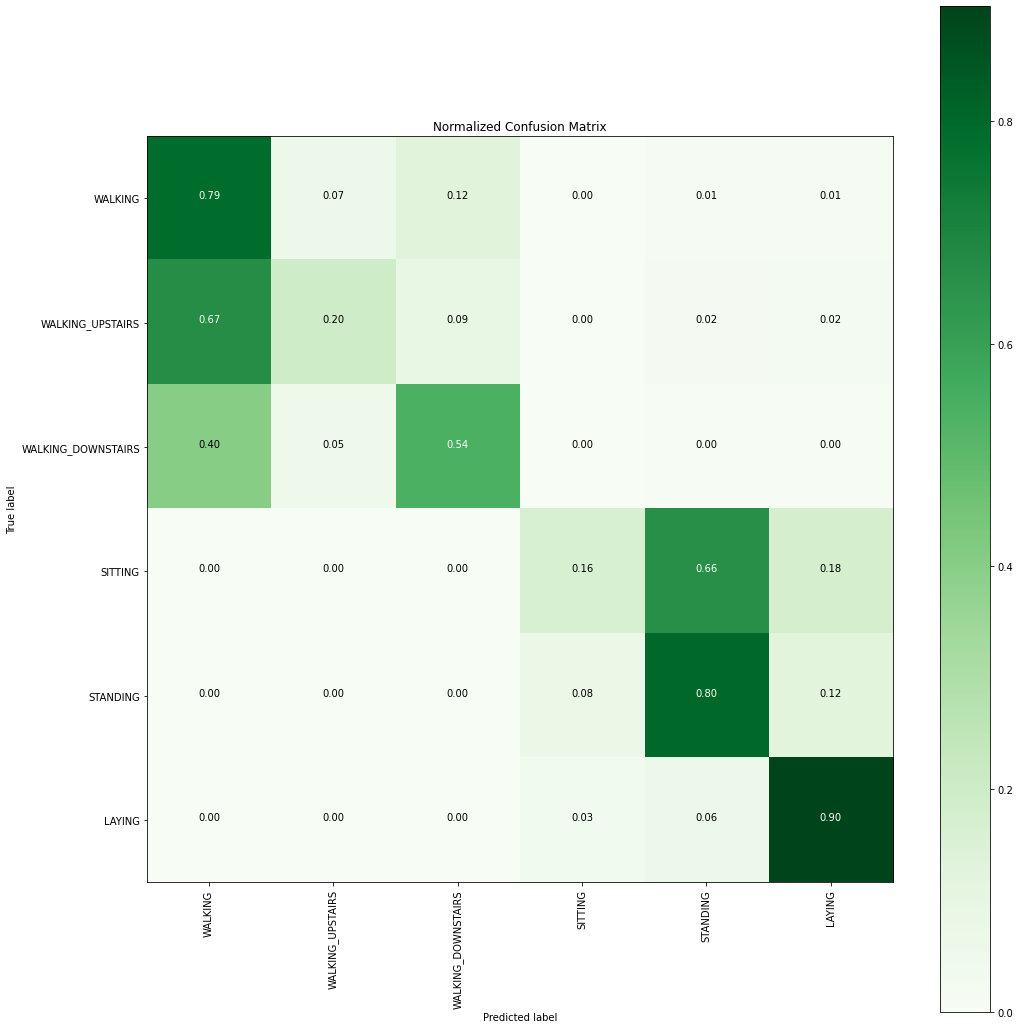


 F1 Score:0.528488174725274


==> Best Estimator:
	RandomForestClassifier(max_depth=8, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 8, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.585191778013146
epsilon: 1.6
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:06:49.129872

Predicting test data
==> testing time:- 0:00:00.098796

==> Accuracy:- 0.7006892024942566


 ********Confusion Matrix********

 [[437  56  46   0   1   1]
 [187 259  45   0   1   0]
 [104  33 291   0   0   0]
 [  0   0   0 148 314  44]
 [  0   0   0  65 456  12]
 [  0   0   0   3   0 544]]


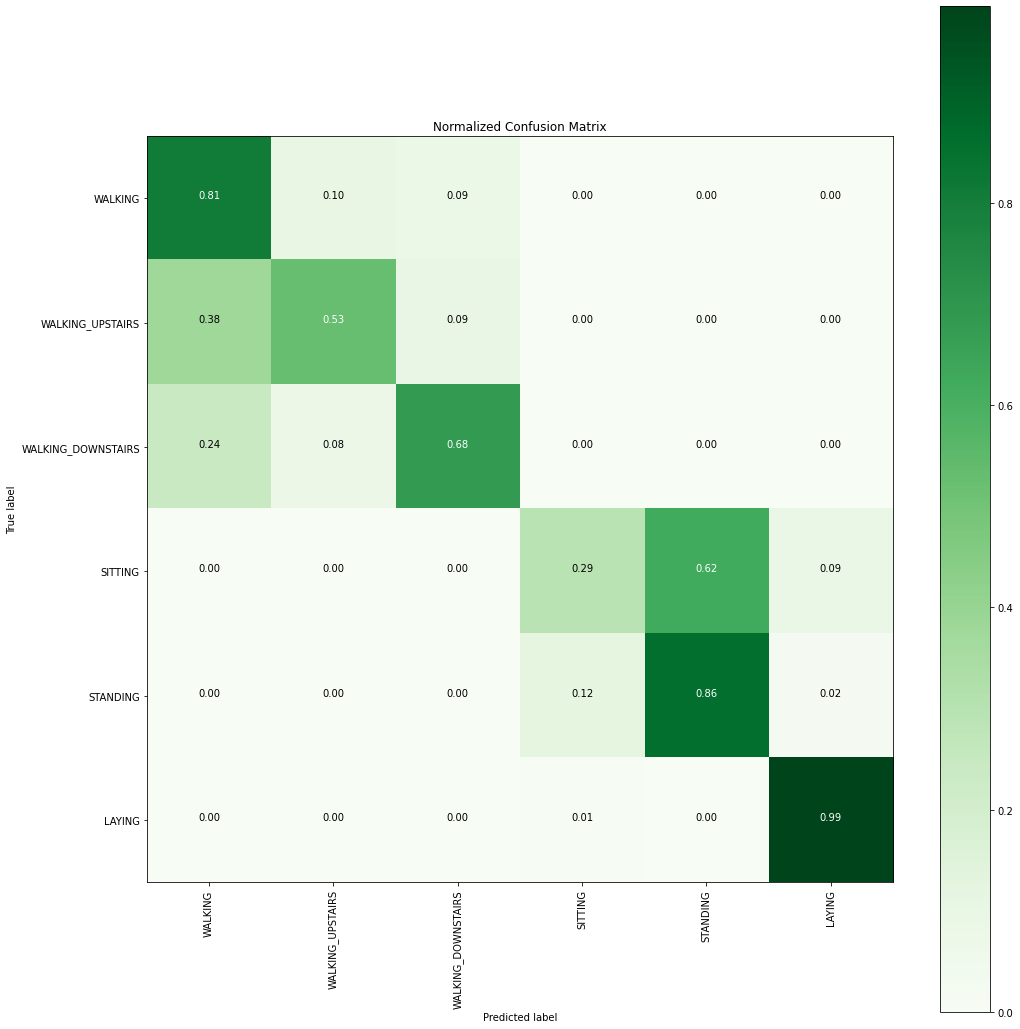


 F1 Score:0.6800790891967333


==> Best Estimator:
	RandomForestClassifier(max_depth=10, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 10, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.7256709194034763
epsilon: 1.7
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:06:51.278578

Predicting test data
==> testing time:- 0:00:00.115295

==> Accuracy:- 0.7131604857236626


 ********Confusion Matrix********

 [[433  60  46   1   1   0]
 [156 282  50   2   2   0]
 [ 89  54 285   0   0   0]
 [  0   0   0 172 303  31]
 [  0   0   0  65 459   9]
 [  0   0   0   4   1 542]]


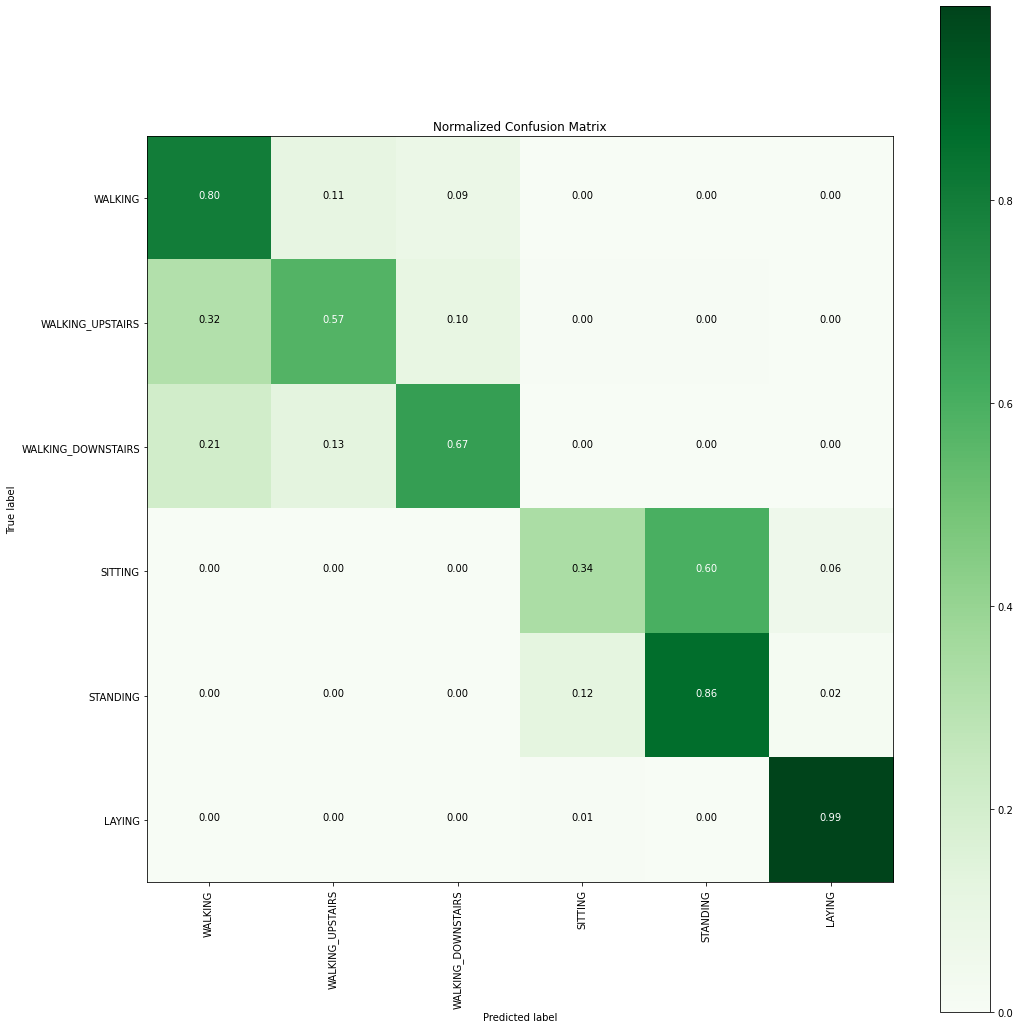


 F1 Score:0.6959388171713877


==> Best Estimator:
	RandomForestClassifier(max_depth=12, n_estimators=140)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 12, 'n_estimators': 140}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.7290642716562428
epsilon: 1.8
training the model...
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Done
==> training time:- 0:06:51.676924

Predicting test data
==> testing time:- 0:00:00.117021

==> Accuracy:- 0.7292418772563177


 ********Confusion Matrix********

 [[449  38  52   1   1   0]
 [157 285  44   1   5   0]
 [ 91  47 290   0   0   0]
 [  0   0   0 191 273  42]
 [  0   0   0  68 464   1]
 [  0   0   0   3   1 543]]


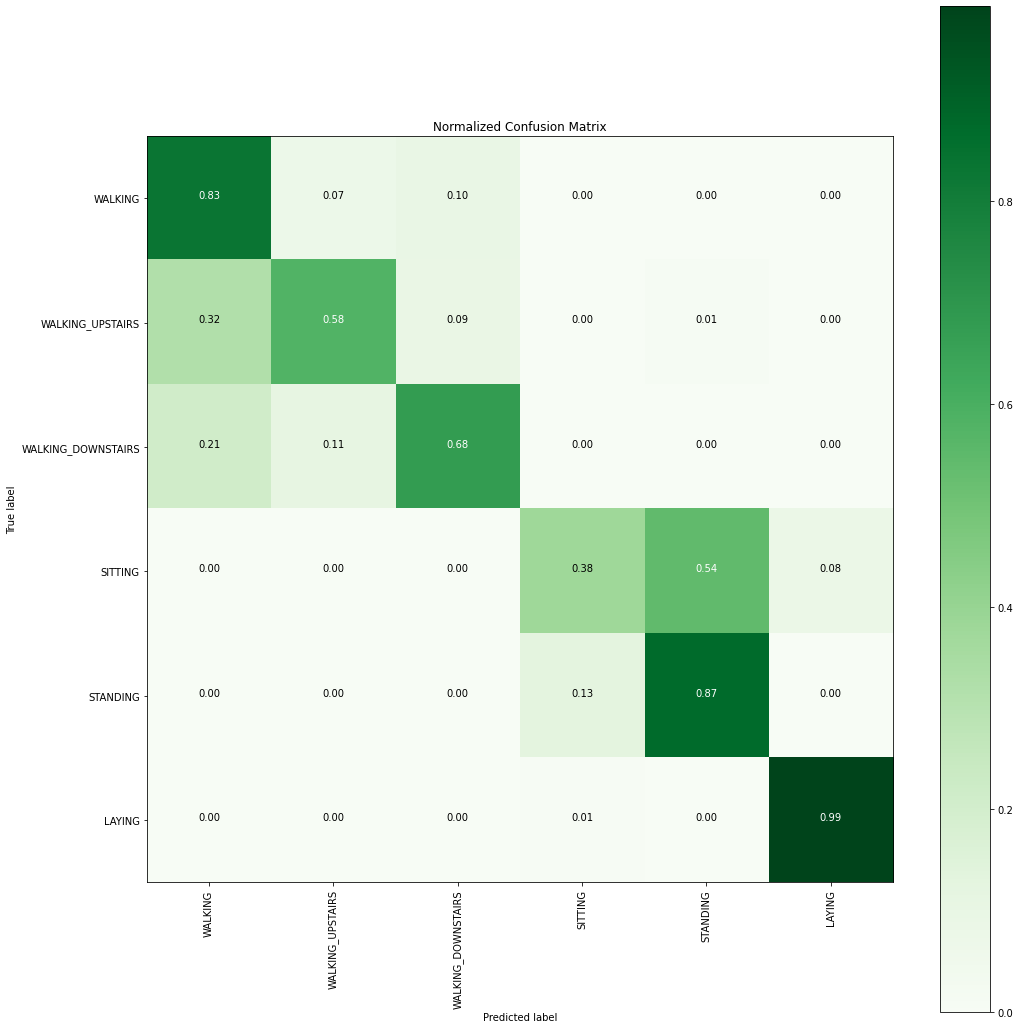


 F1 Score:0.7134119033266959


==> Best Estimator:
	RandomForestClassifier(max_depth=12, n_estimators=150)


==> Best parameters:
	Parameters of best estimator : {'max_depth': 12, 'n_estimators': 150}

==> No. of CrossValidation sets:
	Total nmber of cross validation sets: 5

==> Best Score:
	Average Cross Validate scores of Best estimator : 0.7447492043259593


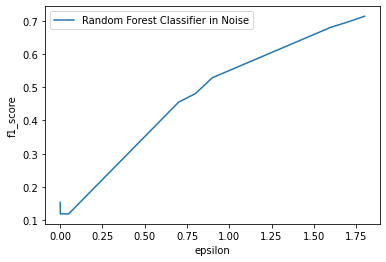

[0.15340664065566037, 0.11907263535329249, 0.11877693676134625, 0.45481455089890943, 0.480842698642701, 0.528488174725274, 0.6800790891967333, 0.6959388171713877, 0.7134119033266959]


In [ ]:
f1_array_random_act = []
acc_array_random_act = []

params = {'n_estimators': np.arange(110,151,10), 'max_depth':np.arange(6,15,2)}

for epsilon in epsilons:
  print("epsilon: "+ str(epsilon))
  X_train, X_test, y_train, y_test = split_train_test_data(df_concat, 'activity_Id')

  for col in X_train:
    # default sensitivity = 1.0
    # print("------epsilon--------")
    X_train[col] = X_train[col].apply(lambda x: x + np.random.laplace(0, 1.0/epsilon))
    X_test[col] = X_test[col].apply(lambda x: x + np.random.laplace(0, 1.0/epsilon))

  rfc = RandomForestClassifier()
  rfc_grid = GridSearchCV(rfc, param_grid=params, cv=5, verbose=1, n_jobs=-1)
  rfc_grid_results, f1 = perform_model_epsilon(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels_act)

  f1_array_random_act.append(f1)
  acc_array_random_act.append(rfc_grid_results['accuracy'])

  # observe the attributes of the model 
  print_grid_search_attributes(rfc_grid_results['model'])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(epsilons, f1_array_random_act, label='Random Forest Classifier in Noise')
ax.set_xlabel('epsilon')
ax.set_ylabel('f1_score')
plt.legend(loc='best')
plt.show()

print(f1_array_random_act)


In [ ]:
# epsilons = [0.0001, 0.001, 0.05, 0.7, 0.8, 0.9, 1.6 1.7, 1.8]
print(f1_array_random_act)
print(f1_array_random_uid)
print(acc_array_random_act)
print(acc_array_random_uid)

[0.15340664065566037, 0.11907263535329249, 0.11877693676134625, 0.45481455089890943, 0.480842698642701, 0.528488174725274, 0.6800790891967333, 0.6959388171713877, 0.7134119033266959]
[0.017246770683357004, 0.014664669981262174, 0.015286690226399485, 0.02165988290921155, 0.02183251471414976, 0.028487947977453253, 0.058263102616550516, 0.06441280789123116, 0.07824240887026337]
[0.18017722349852314, 0.17820807351493273, 0.17919264850672792, 0.5100098457499179, 0.5339678372169346, 0.5753199868723334, 0.7006892024942566, 0.7131604857236626, 0.7292418772563177]
[0.037742041352149654, 0.032819166393173616, 0.033475549721037084, 0.041352149655398754, 0.04299310797505743, 0.04660321627830653, 0.08795536593370529, 0.09255004922874958, 0.11060059074499508]
